In [1]:
import numpy as np

In [2]:
N = np.array([
    [0.436, -0.281, 0.121],
    [0.614,  0.064, 0.046],
    [0.603,  0.230, 0.167],
])

In [3]:
N_inv = np.linalg.inv(N)

In [5]:
np.set_printoptions(suppress=True)

In [6]:
N_inv

array([[ 0.00322543,  2.23262683, -0.61731205],
       [-2.23391103, -0.00450963,  1.61982442],
       [ 3.06499761, -8.05530996,  5.98610507]])

In [7]:
import sympy as sp

In [8]:
M = sp.Matrix(N_inv)

In [10]:
from sympy.abc import x, y, z

In [11]:
X = sp.Matrix([x, y, z])

In [12]:
X

Matrix([
[x],
[y],
[z]])

In [118]:
(M*X).tolist()

[[0.00322543304126439*x + 2.23262683209076*y - 0.617312045953103*z],
 [-2.23391103228312*x - 0.00450963323361939*y + 1.61982441937128*z],
 [3.06499761258225*x - 8.05530996471257*y + 5.9861050733792*z]]

In [125]:
N_inv.dot(np.array([x1, x2, x3]))

array([((((0.003225433041264393)*(v7))+((2.232626832090765)*(v8)))+((-0.6173120459531029)*(v9))),
       ((((-2.23391103228312)*(v7))+((-0.004509633233619392)*(v8)))+((1.6198244193712816)*(v9))),
       ((((3.0649976125822467)*(v7))+((-8.055309964712567)*(v8)))+((5.986105073379199)*(v9)))],
      dtype=object)

In [44]:
from gekko import GEKKO

In [157]:
m = GEKKO()
m.time = [0, 1]

In [158]:
u = m.Const(4.)

In [159]:
x1, x2, x3 = m.Var(0.), m.Var(0.), m.Var(0.)

In [160]:
dx1, dx2, dx3 = m.Var(0.), m.Var(0.), m.Var(0.)

In [161]:
m.Equation(5*dx1 == -x1**2 + 4)
m.Equation(5*dx2 == -x2**2 + 4)
m.Equation(5*dx3 == -x3**2 + 4)

In [162]:
for eql, eqr in zip(N_inv.dot(np.array([x1, x2, x3])).tolist(), [dx1, dx2, dx3]):
    m.Equation(eql == eqr)

In [50]:
m.Equations([
0.00322543304126439*x1 + 2.23262683209076*x2 - 0.617312045953103*x3 == dx1,
-2.23391103228312*x1 - 0.00450963323361939*x2 + 1.61982441937128*x3 == dx2,
3.06499761258225*x1 - 8.05530996471257*x2 + 5.9861050733792*x3 == dx3])

In [163]:
m.options.IMODE = 4
m.options.NODES = 3

In [164]:
solution = m.solve()

apm 176.61.86.133_gk_model11 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.6
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            1
   Variables    :            6
   Intermediates:            0
   Connections  :            0
   Equations    :            6
   Residuals    :            6
 
 Number of state variables:             12
 Number of total equations: -           12
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Simulation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains 

In [64]:
from scipy.integrate import odeint

In [65]:
?odeint

In [68]:
def fun(y, t):
    return (-y**2 + 4)/5

In [71]:
t = [0, 0.5 - np.sqrt(5)/10, 0.5 + np.sqrt(5)/10, 1]

In [81]:
ode = np.squeeze(odeint(fun, 0, t))

In [77]:
x0 = [0.0, 0.0]

In [143]:
col = np.array([x[1] for x in [x0, x1, x2, x3]])

In [144]:
(ode - col)**2

array([0.        , 0.00000005, 0.00000036, 0.0000001 ])

In [145]:
ma = GEKKO()
tf = 1.0
ma.time = np.linspace(0, tf, 50)

In [146]:
xa = ma.Var(0.)

In [147]:
ma.Equation(5*xa.dt() == -xa**2 + 4)

In [148]:
ma.options.IMODE = 4
ma.options.NODES = 7
ma.solve()

apm 176.61.86.133_gk_model9 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.6
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            1
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:            490
 Number of total equations: -          490
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Simulation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains I

In [94]:
xa

[0.0, 0.01632617, 0.03265016, 0.0489698, 0.06528292, 0.08158735, 0.09788092, 0.1141615, 0.1304269, 0.146675, 0.1629036, 0.1791107, 0.1952941, 0.2114517, 0.2275815, 0.2436813, 0.2597491, 0.2757829, 0.2917806, 0.3077403, 0.3236599, 0.3395376, 0.3553712, 0.3711591, 0.3868991, 0.4025895, 0.4182285, 0.4338141, 0.4493447, 0.4648183, 0.4802334, 0.4955882, 0.510881, 0.5261101, 0.541274, 0.556371, 0.5713996, 0.5863582, 0.6012455, 0.6160598, 0.6307999, 0.6454642, 0.6600515, 0.6745604, 0.6889896, 0.7033379, 0.717604, 0.7317868, 0.7458852, 0.7598979]

In [98]:
type(xa.VALUE.value)

list

In [101]:
col_interpolated = np.interp(ma.time, t, col)
ode_interpolated = np.interp(ma.time, t, ode)

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

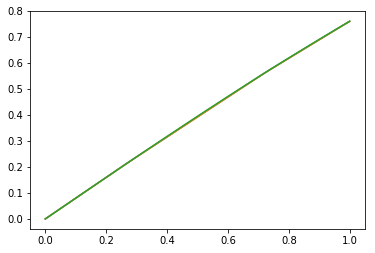

In [103]:
plt.plot(ma.time, col_interpolated, label="collocation")
plt.plot(ma.time, ode_interpolated, label="odeint")
plt.plot(ma.time, xa, label="sim")
plt.legend()
plt.show()

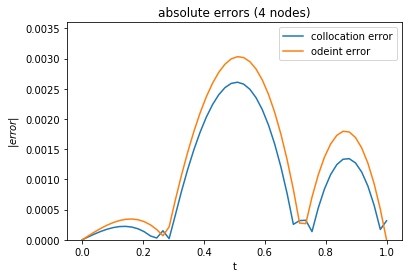

In [114]:
plt.plot(ma.time, np.abs(col_interpolated - xa), label="collocation error")
plt.plot(ma.time, np.abs(ode_interpolated - xa), label="odeint error")
plt.title("absolute errors (4 nodes)")
plt.ylim((0.0, 0.0036))
plt.xlabel("t")
plt.ylabel("$|error|$")
plt.legend()